<a href="https://colab.research.google.com/github/urieliram/tc_uc/blob/main/Simulation_LBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation 
import random 
import math 
import glob
from PIL import Image
import matplotlib.patheffects as path_effects


In [2]:
def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

In [3]:
def square(xo,yo,d,IO):
    arr2  = []
    s     = math.ceil((math.sqrt(len(IO))))
    delta = d / s
    alpha = 0
    beta  = 0
    j=0
    k=0
    IOm = []
    temp = []
    for i in IO:
        if j >= s:
            IOm.append(temp)
            temp = []
            j=0
        temp.append(i)
        j=j+1
        k=k+1
        if k == len(IO):
            IOm.append(temp)
    
    alpha = 0
    beta  = 0
    for i in IOm:
        for j in i:
            x = xo + alpha
            y = yo - beta
            arr2.append([x,y,j])
            alpha = alpha + delta
        beta  = beta + delta
        alpha = 0

    return arr2

In [4]:
def getIO(n=0,ngen=36):
    IO = []
    for i in range(ngen):
        IO.append(rand_bin_array(n,48).tolist())
    return IO

In [8]:
def animate(IO,id,length = 10,markersize=3):
    GEN    = len(IO)
    sqrGEN = math.ceil((math.sqrt(GEN)))
    pos    = (sqrGEN,sqrGEN)
    pos    = np.zeros(pos)
    step   = length/sqrGEN
    plt.rcParams["figure.figsize"] = [length, length]

    plt.xlim(0, length)
    plt.ylim(0, length)

    jj=0
    for j in range(sqrGEN,0,-1):
        for i in range(sqrGEN):  
            if jj == len(IO):
                break
            arr = square(i*step+step/10, +j*step-step/10, step-step/12, IO[jj])
            for k in arr:
                color='blue'
                alpha=0.2
                if k[2]==1:
                    color='red'
                    alpha=1
                plt.plot(k[0], k[1], marker="o", markersize=markersize, markeredgecolor=color, markerfacecolor=color,alpha=alpha)
                text = plt.text(0.1, 0.1, str(id), ha='center', va='center', size=12)
                text.set_path_effects([path_effects.Normal()])     
            jj=jj+1
    plt.savefig(str(id)+'.png', transparent=False)
    plt.show()
    plt.close()

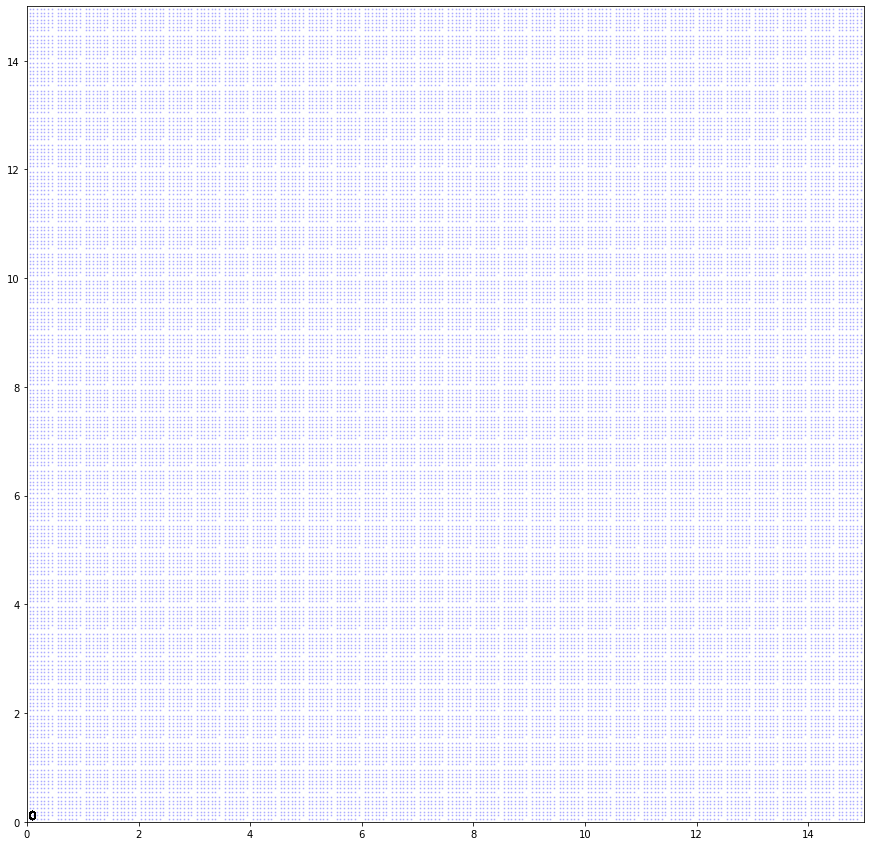

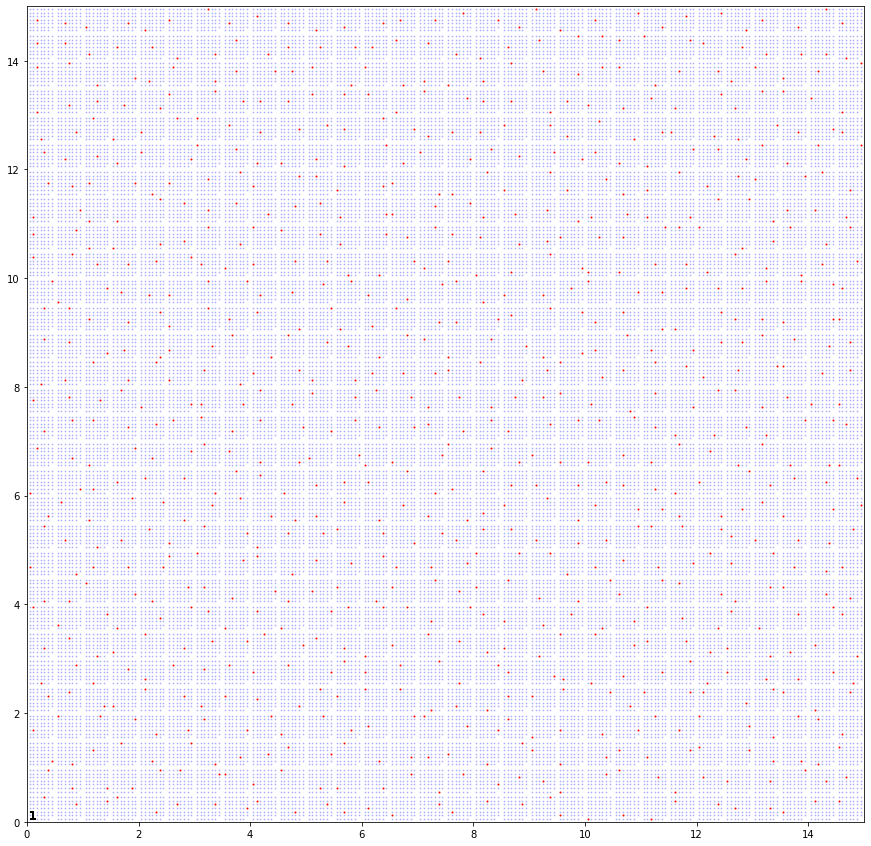

In [9]:
n=2               ## numero de frames
ngen=900          ## numero de generadores
for i in range(n):
    animate(IO=getIO(i,ngen), id=i, length = 15, markersize=1)

In [7]:
##https://www.blog.pythonlibrary.org/2021/06/23/creating-an-animated-gif-with-python/
def make_gif(frame_folder,n):
    frames = []
    for i in range(n):
        frames.append(Image.open('/content/'+str(i)+'.png'))
        
    frame_one = frames[0]
    frame_one.save("my_sim.gif", format="GIF", append_images=frames,
                   save_all=True, duration=2000, loop=0)
    
make_gif("/content/",n=n)